<a href="https://colab.research.google.com/github/PreamJ/LDA_Bud/blob/main/%E0%B8%B4bud_lda00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

00 -> preprocess <br>
01 -> topic modeling (q/a/m) <br>
02 -> search

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
RANDOM_STATE = 1

In [ ]:
import os
folder_path = '/content/drive/MyDrive/LDA_bud/data'
file_names = [f for f in os.listdir(folder_path) if f.endswith('.xlsx')]
file_names

['DUZSGw1wYuk.xlsx',
 'noF_RWMI6Dg.xlsx',
 'o7EWuiNkFuQ.xlsx',
 'l0eZjCT9TAk.xlsx',
 'j9liRClnrXk.xlsx',
 'VjgPlnjGleg.xlsx',
 '3P29xaLxv08.xlsx',
 'iif4n4pkzuw.xlsx',
 '9nKAgMUdnRk.xlsx',
 'FWdr_km8MMc.xlsx',
 '_bph8SNqh6M.xlsx',
 '2Y0fprt4Npo.xlsx',
 'W-L6O_QehNA.xlsx',
 '7Xksk9O6nME.xlsx',
 'r-tdvVhT20E.xlsx',
 '5J1w9mQkgfM.xlsx',
 'QeqW896WhGY.xlsx',
 'WBrfkiQZtko.xlsx',
 '_aCk-ldEioI.xlsx',
 'eQ91p0tvNP0.xlsx',
 'm2kDCkcMdpI.xlsx',
 'njGZ2uJMouk.xlsx',
 'zd2BvInRjyw.xlsx',
 'Nsiu2_AvcvI.xlsx',
 '3WBriOaWB6s.xlsx',
 '32BiD1AuzaU.xlsx',
 '8MD8Z3yYIhc.xlsx',
 'bI7JRmFwo5o.xlsx',
 'PvIhrDqkvFg.xlsx',
 'sh7rAcsmVLQ.xlsx',
 'nmfAp-QqOBk.xlsx',
 'Bo8ONxjYrso.xlsx',
 'xzIIY9k6mPY.xlsx',
 '4xUJ2gv1ztU.xlsx',
 '7C7BRIdtdS4.xlsx',
 'j-31YhzGo-Q.xlsx',
 '8zaOP0sIPjw.xlsx',
 'GzNSRz0UEgw.xlsx',
 'QzI2zLXp-cs.xlsx',
 '7h79lz1anRc.xlsx',
 'xKJ5P96Z0fo.xlsx',
 'Pleh2CjG4nU.xlsx',
 'YZ-fHFcoOhc.xlsx',
 'D8gZMqxH5Tc.xlsx',
 '65pDfDrdOqQ.xlsx',
 'qvCA_5qE0Rw.xlsx',
 'lvp6rrX8Lho.xlsx',
 'Ju9IIBh_PCo

In [ ]:
import pandas as pd
dfs = []

for i in range(len(file_names)):
  dfs.append(pd.read_excel(os.path.join(folder_path, file_names[i])))
combined_df = pd.concat(dfs, ignore_index=True)
combined_df

,question,answer,start_time,end_time,Unnamed: 0,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,end_time,Start Time,End Time
0,เราอยู่ในสังคมปกติที่ดีอยู่แล้วการกระทําของเรา...,โลกียะคือสิ่งที่เปลี่ยนแปลงได้ตลอด (ดีก็เปลี่ย...,00.01.01,00.27.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,สมมติว่าโยมเนี่ยกําลังปฏิบัติอยู่ก็ถือว่าชีวิต...,ทางที่จะไปมันยังไม่ถึงก็เป็นคือเดินเข้าไปสู่โล...,00.29.57,00.45.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,เราต้องกําหนดรู้จนวันตาย,ถ้าเรารู้แจ้งพระนิพพานแล้วก็ไม่ต้องกําหนดรู้วั...,00.45.37,00.46.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,บางทีเราก็อยากอยู่สบายๆ คือไม่ต้องทําอะไร ไม่ต...,จิตมันกินอารมณ์เป็นเรื่องปกติ แต่เรากับจิตคนละ...,00.46.10,00.47.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ที่มันส่งผลหนักๆนะคะมันก็เบาๆลดลง พอมันลดลงก็เ...,อันนี้แหละก็เป็นหลักการอันหนึ่งของคนที่มีปัญญา...,00.47.22,00.48.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2180,การที่เห็นแค่ปิติ ถ้าเราต้องการเป็นจิตเราต้องท...,ต้องไปทักว่า ปิติกําลังเกิดขึ้นกับจิต จิตกําลั...,02.04.55,02.06.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2181,ธัมมานุปัสสนา คืออะไร,จะมีอนิจจานุปัสสีวิราคานุปัสสี นิโรธานุปัสสี ป...,02.07.41,02.11.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2182,ในขั้นธัมมานุปัสสนา เรายึดพระใดพระหนึ่งขึ้นมาด...,ใช่ดูได้เลยไม่ต้องดูทั้งหมด นิวรณ์ห้าก็อาศัยขั...,02.13.03,02.14.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2183,ถ้าเราโพชฌงค์ทั้ง7ข้อมาเจริญไม่มีทางทำได้ใช่ไหม,ไม่ได้ ต้องมีสติในสติปัฏฐานก่อน ถ้ามีสติในสติป...,02.15.14,02.17.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data = combined_df.iloc[:, lambda combined_df: [0, 1]]
data

,question,answer
0,เราอยู่ในสังคมปกติที่ดีอยู่แล้วการกระทําของเรา...,โลกียะคือสิ่งที่เปลี่ยนแปลงได้ตลอด (ดีก็เปลี่ย...
1,สมมติว่าโยมเนี่ยกําลังปฏิบัติอยู่ก็ถือว่าชีวิต...,ทางที่จะไปมันยังไม่ถึงก็เป็นคือเดินเข้าไปสู่โล...
2,เราต้องกําหนดรู้จนวันตาย,ถ้าเรารู้แจ้งพระนิพพานแล้วก็ไม่ต้องกําหนดรู้วั...
3,บางทีเราก็อยากอยู่สบายๆ คือไม่ต้องทําอะไร ไม่ต...,จิตมันกินอารมณ์เป็นเรื่องปกติ แต่เรากับจิตคนละ...
4,ที่มันส่งผลหนักๆนะคะมันก็เบาๆลดลง พอมันลดลงก็เ...,อันนี้แหละก็เป็นหลักการอันหนึ่งของคนที่มีปัญญา...
...,...,...
2180,การที่เห็นแค่ปิติ ถ้าเราต้องการเป็นจิตเราต้องท...,ต้องไปทักว่า ปิติกําลังเกิดขึ้นกับจิต จิตกําลั...
2181,ธัมมานุปัสสนา คืออะไร,จะมีอนิจจานุปัสสีวิราคานุปัสสี นิโรธานุปัสสี ป...
2182,ในขั้นธัมมานุปัสสนา เรายึดพระใดพระหนึ่งขึ้นมาด...,ใช่ดูได้เลยไม่ต้องดูทั้งหมด นิวรณ์ห้าก็อาศัยขั...
2183,ถ้าเราโพชฌงค์ทั้ง7ข้อมาเจริญไม่มีทางทำได้ใช่ไหม,ไม่ได้ ต้องมีสติในสติปัฏฐานก่อน ถ้ามีสติในสติป...


In [ ]:
new_df = data.dropna()
print(f"before remove NAN {len(data)}")
print(f"after remove NAN {len(new_df)}")
new_df

before remove NAN 2185
after remove NAN 2167


,question,answer
0,เราอยู่ในสังคมปกติที่ดีอยู่แล้วการกระทําของเรา...,โลกียะคือสิ่งที่เปลี่ยนแปลงได้ตลอด (ดีก็เปลี่ย...
1,สมมติว่าโยมเนี่ยกําลังปฏิบัติอยู่ก็ถือว่าชีวิต...,ทางที่จะไปมันยังไม่ถึงก็เป็นคือเดินเข้าไปสู่โล...
2,เราต้องกําหนดรู้จนวันตาย,ถ้าเรารู้แจ้งพระนิพพานแล้วก็ไม่ต้องกําหนดรู้วั...
3,บางทีเราก็อยากอยู่สบายๆ คือไม่ต้องทําอะไร ไม่ต...,จิตมันกินอารมณ์เป็นเรื่องปกติ แต่เรากับจิตคนละ...
4,ที่มันส่งผลหนักๆนะคะมันก็เบาๆลดลง พอมันลดลงก็เ...,อันนี้แหละก็เป็นหลักการอันหนึ่งของคนที่มีปัญญา...
...,...,...
2180,การที่เห็นแค่ปิติ ถ้าเราต้องการเป็นจิตเราต้องท...,ต้องไปทักว่า ปิติกําลังเกิดขึ้นกับจิต จิตกําลั...
2181,ธัมมานุปัสสนา คืออะไร,จะมีอนิจจานุปัสสีวิราคานุปัสสี นิโรธานุปัสสี ป...
2182,ในขั้นธัมมานุปัสสนา เรายึดพระใดพระหนึ่งขึ้นมาด...,ใช่ดูได้เลยไม่ต้องดูทั้งหมด นิวรณ์ห้าก็อาศัยขั...
2183,ถ้าเราโพชฌงค์ทั้ง7ข้อมาเจริญไม่มีทางทำได้ใช่ไหม,ไม่ได้ ต้องมีสติในสติปัฏฐานก่อน ถ้ามีสติในสติป...


In [ ]:
import pickle
with open('/content/drive/MyDrive/LDA_bud/preprocessed_data/data.pickle', 'wb') as f:
    pickle.dump(new_df, f)

# Preprocess data

In [ ]:
!pip install pythainlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.9/17.9 MB 54.1 MB/s eta 0:00:00


In [ ]:
from pythainlp.tokenize import word_tokenize
from pythainlp.corpus import thai_stopwords

In [ ]:
def preprocess(text):
    stopwords = list(thai_stopwords())
    read_stopwords = pd.read_excel('/content/drive/MyDrive/LDA_bud/stopwords/add_stopwords.xlsx')
    add_stopwords = read_stopwords['stopword'].values.tolist()
    result = []
    str_text = str(text).replace(' ','')
    word_token = word_tokenize(str_text, engine='newmm')
    for word in word_token:
        if(word not in stopwords + add_stopwords):
            result.append(word)
    return result


In [ ]:
def word_tokenization(corpus):
  words_token = []
  for document in corpus:
    words_token.append(preprocess(document))
  return words_token

# Question Part



In [ ]:
import re
import pickle
question_data = new_df['question']
question_data = question_data.map(lambda x: re.sub('[,.!?*#/]', '', x))
question_data

0       เราอยู่ในสังคมปกติที่ดีอยู่แล้วการกระทําของเรา...
1       สมมติว่าโยมเนี่ยกําลังปฏิบัติอยู่ก็ถือว่าชีวิต...
2                                เราต้องกําหนดรู้จนวันตาย
3       บางทีเราก็อยากอยู่สบายๆ คือไม่ต้องทําอะไร ไม่ต...
4       ที่มันส่งผลหนักๆนะคะมันก็เบาๆลดลง พอมันลดลงก็เ...
                              ...                        
2180    การที่เห็นแค่ปิติ ถ้าเราต้องการเป็นจิตเราต้องท...
2181                                ธัมมานุปัสสนา คืออะไร
2182    ในขั้นธัมมานุปัสสนา เรายึดพระใดพระหนึ่งขึ้นมาด...
2183      ถ้าเราโพชฌงค์ทั้ง7ข้อมาเจริญไม่มีทางทำได้ใช่ไหม
2184                                สัมโพชฌงค์เจริญยังไง 
Name: question, Length: 2167, dtype: object

In [ ]:
question_token = word_tokenization(question_data)

In [ ]:
len(question_token)

2167

In [ ]:
clear_question_data = []
for i in question_token:
  temp = []
  for j in i:
    if j not in ['\n', 'question', 'answer', 'Name', '...'] and len(j.strip())>3:
      temp.append(j)
  clear_question_data.append(temp)
clear_question_data

[['สังคม',
  'ปกติ',
  'สภาพแวดล้อม',
  'เกี่ยวโยง',
  'ทําไม',
  'เปรียบเทียบ',
  'โลกิยะ',
  'โลกุตระ'],
 ['สมมติ', 'ชีวิต', 'เข้าสู่', 'เดิน', 'มรรค'],
 ['ําหนด'],
 ['ําหนด',
  'ําหนด',
  'เหมือนกับ',
  'ปล่อย',
  'กําหนด',
  'เหมือนกับ',
  'อารมณ์',
  'อารมณ์',
  'รู้สึกตัว',
  'อีกที',
  'อาการ',
  'ฟ้อง',
  'คนละ'],
 ['ส่งผล', 'หนัก', 'ลดลง', 'ลดลง', 'เหมือนว่า', 'รู้สึก'],
 [],
 ['อธิบาย'],
 ['หมายถึง', 'อารมณ์', 'อารมณ์', 'เกิดขึ้น'],
 ['อัตโนมัติ', 'เป็นธรรมชาติ'],
 ['อธิบาย'],
 ['อารมณ์', 'ตัณหา', 'ที่เกิด', 'อารมณ์', 'อารมณ์', 'ตัณหา'],
 ['อธิบาย'],
 ['รับรู้', 'เป็นเอง'],
 ['อธิบาย'],
 ['สมณะ', 'เข้าสู่', 'กระแส', 'นิพพาน'],
 ['อธิบาย'],
 ['เวลา',
  'เวทนา',
  'ความรู้สึก',
  'ปฏิฆะ',
  'ความรู้สึก',
  'ปฏิเสธ',
  'ทุกขเวทนา',
  'ความรู้สึก',
  'ความรู้สึก',
  'ปฏิฆะ',
  'ทุกขเวทนา',
  'เกิดขึ้น',
  'หมาย',
  'ระดับ',
  'ทุกขเวทนา',
  'เกิดขึ้น',
  'มีสติ',
  'พอที่จะ',
  'ปฏิฆะ'],
 ['อธิบาย'],
 ['อธิบาย'],
 ['คลิป',
  'คลิป',
  'การละ',
  'สักกายทิฐิ',
  'อิจฉา',
  'ศิลปะ'

In [ ]:
with open('/content/drive/MyDrive/LDA_bud/preprocessed_data/preprocessed_question_data.pickle', 'wb') as f:
    pickle.dump(clear_question_data, f)

# Answer Part

In [ ]:
answer_data = new_df['answer']
answer_data = answer_data.map(lambda x: re.sub('[,.!?*#/]', '', x))
answer_data

0       โลกียะคือสิ่งที่เปลี่ยนแปลงได้ตลอด (ดีก็เปลี่ย...
1       ทางที่จะไปมันยังไม่ถึงก็เป็นคือเดินเข้าไปสู่โล...
2       ถ้าเรารู้แจ้งพระนิพพานแล้วก็ไม่ต้องกําหนดรู้วั...
3       จิตมันกินอารมณ์เป็นเรื่องปกติ แต่เรากับจิตคนละ...
4       อันนี้แหละก็เป็นหลักการอันหนึ่งของคนที่มีปัญญา...
                              ...                        
2180    ต้องไปทักว่า ปิติกําลังเกิดขึ้นกับจิต จิตกําลั...
2181    จะมีอนิจจานุปัสสีวิราคานุปัสสี นิโรธานุปัสสี ป...
2182    ใช่ดูได้เลยไม่ต้องดูทั้งหมด นิวรณ์ห้าก็อาศัยขั...
2183    ไม่ได้ ต้องมีสติในสติปัฏฐานก่อน ถ้ามีสติในสติป...
2184    เจริญยังไง ก็เจริญโดยการ หนึ่ง วิเวก วิราคะ นิ...
Name: answer, Length: 2167, dtype: object

In [ ]:
answer_token = word_tokenization(answer_data)

In [ ]:
len(answer_token)

2167

In [ ]:
clear_answer_data = []
for i in answer_token:
  temp = []
  for j in i:
    if j not in ['\n', 'question', 'answer', 'Name', '...'] and len(j.strip())>3:
        temp.append(j)
  clear_answer_data.append(temp)
len(clear_answer_data)

2167

In [ ]:
with open('/content/drive/MyDrive/LDA_bud/preprocessed_data/preprocessed_answer_data.pickle', 'wb') as f:
    pickle.dump(clear_answer_data, f)

# Visualization

In [ ]:
processed_data = clear_question_data + clear_answer_data

In [ ]:
words = []
for i in processed_data:
  words.extend(i)

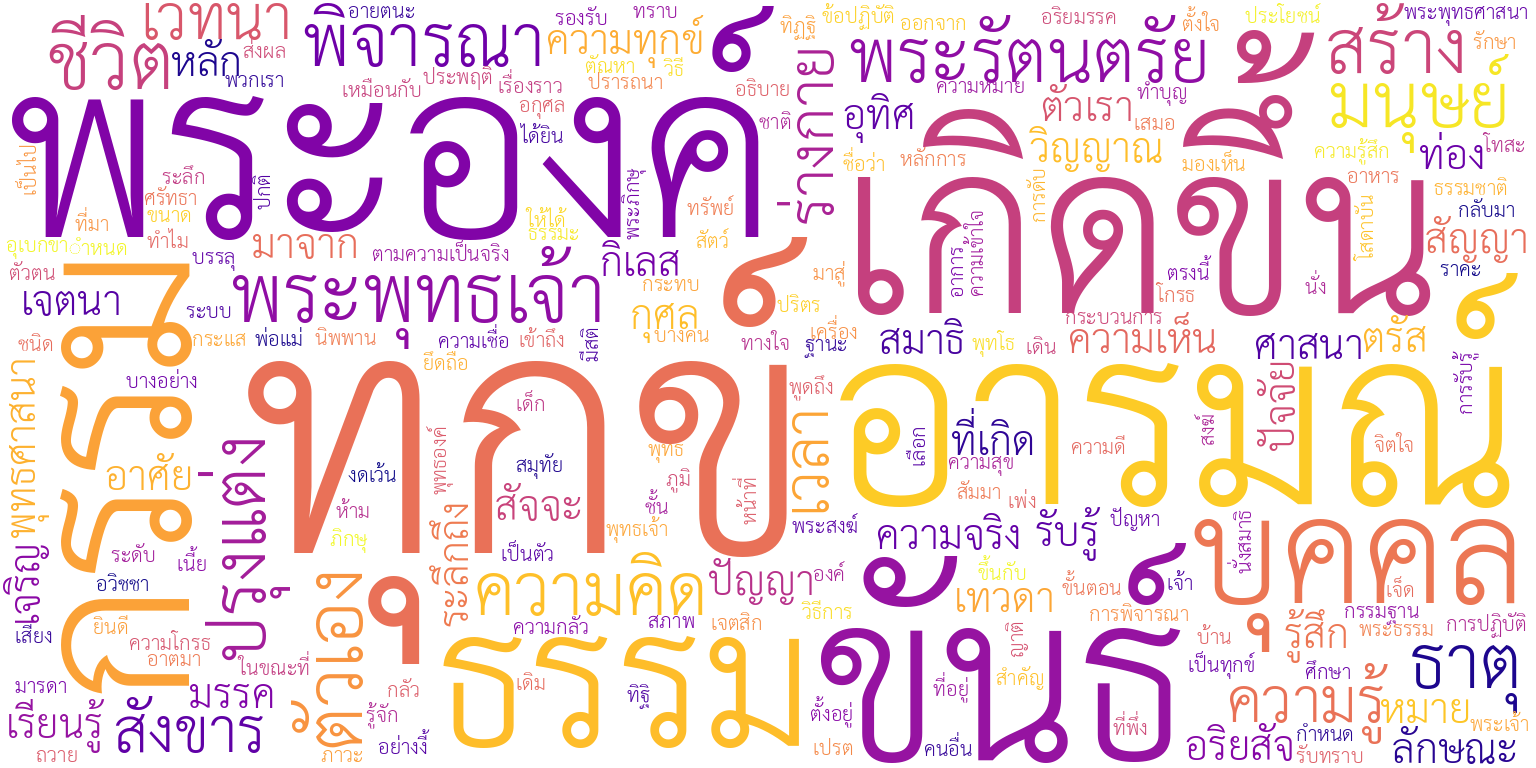

In [ ]:
from wordcloud import WordCloud
# stopwords = ['ก']
path = '/content/drive/MyDrive/LDA_bud/resource/THSarabun.ttf'
wordcloud = WordCloud(font_path=path,
                      relative_scaling=0.3,
                      min_font_size=1,
                      background_color = "white",
                      width=512,
                      height=256,
                      max_words=200,
                      colormap='plasma',
                      stopwords= thai_stopwords(),
                      regexp=r"[ก-๙a-zA-Z']+",
                      scale=3,
                      font_step=5,
                      collocations=False,
                      margin=2
                      ).generate(' '.join(words))
wordcloud.to_image()


In [ ]:
wordcloud.to_file("/content/drive/MyDrive/LDA_bud/wordcloud.png")

In [ ]:
!pip install aspose-words

In [ ]:
import aspose.words as aw

doc = aw.Document()
builder = aw.DocumentBuilder(doc)

shape = builder.insert_image("/content/drive/MyDrive/LDA_bud/wordcloud.png")
shape.get_shape_renderer().save("/content/drive/MyDrive/LDA_bud/wordcloud.svg", aw.saving.ImageSaveOptions(aw.SaveFormat.SVG))


# Split train & test

In [ ]:
a = clear_question_data
b = clear_answer_data

joined_data = [[a[i], b[i]] for i in range(min(len(a), len(b)))]

# print(joined_data)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(joined_data, test_size=0.2, random_state=42)

In [ ]:
len(X_train)

1733

In [ ]:
len(X_test)

434

In [ ]:
import pickle

train_file_path = "/content/drive/MyDrive/LDA_bud/preprocessed_data/train.pickle"
test_file_path = "/content/drive/MyDrive/LDA_bud/preprocessed_data/test.pickle"

with open(train_file_path, 'wb') as f:
    pickle.dump(X_train, f)
with open(test_file_path, 'wb') as f:
    pickle.dump(X_test, f)

# Create tradition Model

In [ ]:
flattened_data = [item for sublist in X_train for item in sublist]
len(flattened_data)

3466

In [ ]:
import gensim

id2word = gensim.corpora.Dictionary(flattened_data)
with open('/content/drive/MyDrive/LDA_bud/preprocessed_data/id2word.pkl', 'wb') as f:
  pickle.dump(id2word, f)

In [ ]:
corpus = []
for text in flattened_data:
  vec = id2word.doc2bow(text)
  corpus.append(vec)
pd.Series(corpus)
with open('/content/drive/MyDrive/LDA_bud/preprocessed_data/corpus.pkl', 'wb') as f:
  pickle.dump(corpus, f)

In [ ]:
def create_lda(num_topics):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=id2word,
                                                num_topics=num_topics,
                                                iterations=1000,
                                                chunksize=len(corpus),
                                                passes=10,
                                                alpha='auto',
                                                eta='auto',
                                                random_state=RANDOM_STATE,
                                                update_every=0,
                                                minimum_probability=0,
                                                eval_every=1
                                                )
    return lda_model

In [ ]:
num_topics = 5
lda_model_5 = create_lda(num_topics)
with open('/content/drive/MyDrive/LDA_bud/LDA_model/lda_model_5.pkl', 'wb') as f:
    pickle.dump(lda_model_5, f)
lda_model_5.show_topics(num_topics, num_words=10)

[(0,
  '0.031*"อารมณ์" + 0.015*"ขันธ์" + 0.013*"เกิดขึ้น" + 0.012*"ทุกข์" + 0.009*"สมาธิ" + 0.008*"ปรุงแต่ง" + 0.008*"พระองค์" + 0.007*"เวทนา" + 0.007*"สังขาร" + 0.006*"ธรรม"'),
 (1,
  '0.022*"ท่อง" + 0.017*"ธาตุ" + 0.010*"พิจารณา" + 0.009*"ธรรม" + 0.008*"ร่างกาย" + 0.008*"รักษา" + 0.008*"พระรัตนตรัย" + 0.007*"พระองค์" + 0.007*"อธิบาย" + 0.007*"งดเว้น"'),
 (2,
  '0.014*"ขันธ์" + 0.011*"เกิดขึ้น" + 0.010*"สมุทัย" + 0.009*"กิเลส" + 0.009*"ทุกข์" + 0.009*"อารมณ์" + 0.008*"ตัณหา" + 0.008*"ธาตุ" + 0.008*"พิจารณา" + 0.008*"สัจจะ"'),
 (3,
  '0.013*"พระองค์" + 0.012*"บุคคล" + 0.012*"เทวดา" + 0.011*"มนุษย์" + 0.010*"พระพุทธเจ้า" + 0.009*"ธรรม" + 0.009*"อุทิศ" + 0.006*"ศาสนา" + 0.006*"พระรัตนตรัย" + 0.006*"ชีวิต"'),
 (4,
  '0.026*"กรรม" + 0.023*"ทุกข์" + 0.012*"ความทุกข์" + 0.012*"ชีวิต" + 0.012*"เกิดขึ้น" + 0.010*"ความคิด" + 0.010*"เจตนา" + 0.009*"สร้าง" + 0.008*"ขันธ์" + 0.008*"ความรู้"')]

In [ ]:
from gensim.models import CoherenceModel
coherence_lda = CoherenceModel(model=lda_model_5, corpus=corpus, dictionary=id2word, coherence='u_mass')
print(coherence_lda.get_coherence_per_topic())

[-1.635814308428386, -2.349321011582356, -2.0551216853238494, -2.2322981494963123, -1.6704969331695696]


In [ ]:
num_topics = 6
lda_model_6 = create_lda(num_topics)
with open('/content/drive/MyDrive/LDA_bud/LDA_model/lda_model_6.pkl', 'wb') as f:
    pickle.dump(lda_model_6, f)
lda_model_6.show_topics(num_topics, num_words=10)

[(0,
  '0.019*"อารมณ์" + 0.018*"ขันธ์" + 0.011*"เกิดขึ้น" + 0.009*"ปรุงแต่ง" + 0.009*"พิจารณา" + 0.008*"วิญญาณ" + 0.008*"พระองค์" + 0.008*"เวทนา" + 0.008*"สมาธิ" + 0.007*"พระพุทธเจ้า"'),
 (1,
  '0.025*"ท่อง" + 0.020*"ธาตุ" + 0.010*"พิจารณา" + 0.010*"ธรรม" + 0.009*"รักษา" + 0.009*"อธิบาย" + 0.008*"งดเว้น" + 0.008*"ร่างกาย" + 0.008*"พระองค์" + 0.007*"เจตนา"'),
 (2,
  '0.014*"ขันธ์" + 0.011*"เกิดขึ้น" + 0.009*"เวทนา" + 0.009*"พิจารณา" + 0.009*"ตัณหา" + 0.008*"กิเลส" + 0.008*"สมุทัย" + 0.007*"เวลา" + 0.007*"สัจจะ" + 0.007*"ธรรม"'),
 (3,
  '0.013*"บุคคล" + 0.013*"พระองค์" + 0.012*"เทวดา" + 0.011*"พระพุทธเจ้า" + 0.011*"มนุษย์" + 0.010*"ธรรม" + 0.009*"อุทิศ" + 0.006*"ศาสนา" + 0.006*"ปัญญา" + 0.006*"ชีวิต"'),
 (4,
  '0.036*"กรรม" + 0.013*"ชีวิต" + 0.013*"เจตนา" + 0.009*"พระรัตนตรัย" + 0.009*"สร้าง" + 0.009*"พระองค์" + 0.008*"เกิดขึ้น" + 0.007*"ตัวเอง" + 0.007*"ความทุกข์" + 0.006*"กุศล"'),
 (5,
  '0.039*"ทุกข์" + 0.028*"อารมณ์" + 0.017*"ความคิด" + 0.016*"เกิดขึ้น" + 0.011*"ขันธ์" + 0.011*"ความท

In [ ]:
num_topics = 7
lda_model_7 = create_lda(num_topics)
with open('/content/drive/MyDrive/LDA_bud/LDA_model/lda_model_7.pkl', 'wb') as f:
    pickle.dump(lda_model_7, f)
lda_model_7.show_topics(num_topics, num_words=10)

[(0,
  '0.021*"อารมณ์" + 0.011*"พระรัตนตรัย" + 0.010*"พระองค์" + 0.010*"พระพุทธเจ้า" + 0.009*"ระลึก" + 0.009*"ระลึกถึง" + 0.008*"เกิดขึ้น" + 0.007*"ความกลัว" + 0.007*"พิจารณา" + 0.007*"ปริตร"'),
 (1,
  '0.024*"ท่อง" + 0.016*"ธาตุ" + 0.010*"รักษา" + 0.010*"ธรรม" + 0.009*"งดเว้น" + 0.009*"อธิบาย" + 0.009*"พระองค์" + 0.008*"ร่างกาย" + 0.008*"เจตนา" + 0.008*"พิจารณา"'),
 (2,
  '0.010*"ธรรม" + 0.009*"ธาตุ" + 0.009*"สัจจะ" + 0.008*"เวลา" + 0.008*"พระองค์" + 0.007*"นั่งสมาธิ" + 0.007*"พระพุทธเจ้า" + 0.006*"สมุทัย" + 0.006*"การปฏิบัติ" + 0.006*"รู้สึก"'),
 (3,
  '0.014*"บุคคล" + 0.012*"เทวดา" + 0.012*"พระองค์" + 0.011*"พระพุทธเจ้า" + 0.011*"อุทิศ" + 0.011*"มนุษย์" + 0.009*"ธรรม" + 0.007*"ภิกษุ" + 0.006*"ความดี" + 0.006*"ชีวิต"'),
 (4,
  '0.045*"กรรม" + 0.016*"เจตนา" + 0.015*"ชีวิต" + 0.010*"ความทุกข์" + 0.008*"พระองค์" + 0.008*"ตัวเอง" + 0.008*"พระรัตนตรัย" + 0.008*"สร้าง" + 0.008*"เกิดขึ้น" + 0.007*"ทุกข์"'),
 (5,
  '0.039*"ทุกข์" + 0.030*"อารมณ์" + 0.017*"ความคิด" + 0.014*"เกิดขึ้น" + 0.011*

In [ ]:
num_topics = 8
lda_model_8 = create_lda(num_topics)
with open('/content/drive/MyDrive/LDA_bud/LDA_model/lda_model_8.pkl', 'wb') as f:
    pickle.dump(lda_model_8, f)
lda_model_8.show_topics(num_topics, num_words=10)

[(0,
  '0.027*"อารมณ์" + 0.009*"เกิดขึ้น" + 0.008*"ความกลัว" + 0.008*"พระองค์" + 0.008*"ระลึก" + 0.008*"สมาธิ" + 0.008*"พิจารณา" + 0.007*"กลัว" + 0.006*"ลักษณะ" + 0.006*"ธรรม"'),
 (1,
  '0.029*"ท่อง" + 0.019*"ธาตุ" + 0.011*"รักษา" + 0.010*"ธรรม" + 0.010*"งดเว้น" + 0.010*"อธิบาย" + 0.009*"พิจารณา" + 0.009*"ร่างกาย" + 0.009*"พระองค์" + 0.009*"เจตนา"'),
 (2,
  '0.010*"เวลา" + 0.009*"สมุทัย" + 0.009*"ธรรม" + 0.008*"นั่งสมาธิ" + 0.007*"อารมณ์" + 0.007*"เกิดขึ้น" + 0.007*"รู้สึก" + 0.006*"ธาตุ" + 0.006*"การงาน" + 0.006*"พิจารณา"'),
 (3,
  '0.017*"เทวดา" + 0.015*"อุทิศ" + 0.010*"บุคคล" + 0.010*"ธรรม" + 0.009*"มนุษย์" + 0.008*"ถวาย" + 0.008*"อาหาร" + 0.007*"ภิกษุ" + 0.007*"ญาติ" + 0.006*"สงฆ์"'),
 (4,
  '0.051*"กรรม" + 0.017*"ชีวิต" + 0.015*"เจตนา" + 0.013*"ความทุกข์" + 0.010*"ทุกข์" + 0.009*"ตัวเอง" + 0.009*"เกิดขึ้น" + 0.009*"สร้าง" + 0.008*"กุศล" + 0.007*"ตัวเรา"'),
 (5,
  '0.043*"ทุกข์" + 0.036*"อารมณ์" + 0.017*"ความคิด" + 0.013*"เกิดขึ้น" + 0.012*"ความทุกข์" + 0.010*"มรรค" + 0.009*"อริยสั

In [ ]:
num_topics = 9
lda_model_9 = create_lda(num_topics)
with open('/content/drive/MyDrive/LDA_bud/LDA_model/lda_model_9.pkl', 'wb') as f:
    pickle.dump(lda_model_9, f)
lda_model_9.show_topics(num_topics, num_words=10)

[(0,
  '0.028*"อารมณ์" + 0.012*"ระลึก" + 0.010*"ความกลัว" + 0.010*"เกิดขึ้น" + 0.009*"พิจารณา" + 0.008*"มีสติ" + 0.008*"พระองค์" + 0.007*"กลัว" + 0.007*"นั่ง" + 0.007*"โทสะ"'),
 (1,
  '0.025*"ท่อง" + 0.013*"ธาตุ" + 0.012*"รักษา" + 0.012*"อธิบาย" + 0.011*"งดเว้น" + 0.010*"พระองค์" + 0.009*"เจตนา" + 0.009*"ธรรม" + 0.008*"พิจารณา" + 0.008*"ปัญญา"'),
 (2,
  '0.011*"เวลา" + 0.011*"ธรรม" + 0.010*"สมุทัย" + 0.009*"นั่งสมาธิ" + 0.008*"การงาน" + 0.008*"รู้สึก" + 0.008*"เพื่อน" + 0.007*"พิจารณา" + 0.006*"อารมณ์" + 0.006*"สัจจะ"'),
 (3,
  '0.018*"เทวดา" + 0.017*"อุทิศ" + 0.011*"บุคคล" + 0.010*"ธรรม" + 0.009*"อาหาร" + 0.009*"ถวาย" + 0.008*"ภิกษุ" + 0.008*"ญาติ" + 0.007*"สงฆ์" + 0.007*"บริโภค"'),
 (4,
  '0.054*"กรรม" + 0.017*"ชีวิต" + 0.017*"เจตนา" + 0.014*"ความทุกข์" + 0.010*"ตัวเอง" + 0.009*"ทุกข์" + 0.009*"เกิดขึ้น" + 0.009*"ลักษณะ" + 0.008*"สร้าง" + 0.007*"กุศล"'),
 (5,
  '0.048*"ทุกข์" + 0.042*"อารมณ์" + 0.020*"ความคิด" + 0.014*"เกิดขึ้น" + 0.012*"ความทุกข์" + 0.011*"ความจริง" + 0.011*"มรรค" +

In [ ]:
num_topics = 10
lda_model_10 = create_lda(num_topics)
with open('/content/drive/MyDrive/LDA_bud/LDA_model/lda_model_10.pkl', 'wb') as f:
    pickle.dump(lda_model_10, f)
lda_model_10.show_topics(num_topics, num_words=10)

[(0,
  '0.020*"พระรัตนตรัย" + 0.014*"ระลึกถึง" + 0.014*"ระลึก" + 0.011*"ความกลัว" + 0.010*"พระพุทธเจ้า" + 0.010*"พุทโธ" + 0.009*"อารมณ์" + 0.008*"กลัว" + 0.008*"พระองค์" + 0.008*"พิจารณา"'),
 (1,
  '0.032*"ท่อง" + 0.018*"ธาตุ" + 0.015*"ธรรม" + 0.014*"พิจารณา" + 0.012*"อธิบาย" + 0.011*"งดเว้น" + 0.010*"เดิน" + 0.008*"ขั้นตอน" + 0.008*"การปฏิบัติ" + 0.008*"ร่างกาย"'),
 (2,
  '0.012*"สมุทัย" + 0.009*"เวลา" + 0.008*"เพื่อน" + 0.007*"อวิชชา" + 0.007*"นั่งสมาธิ" + 0.006*"ธรรม" + 0.006*"มนุษย์" + 0.006*"ตัณหา" + 0.006*"รู้สึก" + 0.005*"สมมุติ"'),
 (3,
  '0.017*"อุทิศ" + 0.015*"เทวดา" + 0.009*"ถวาย" + 0.009*"ธรรม" + 0.009*"บุคคล" + 0.008*"ญาติ" + 0.008*"ภิกษุ" + 0.007*"อาหาร" + 0.007*"ชีวิต" + 0.007*"บ้าน"'),
 (4,
  '0.060*"กรรม" + 0.018*"ชีวิต" + 0.017*"เจตนา" + 0.011*"ความทุกข์" + 0.010*"ตัวเอง" + 0.009*"สร้าง" + 0.008*"กุศล" + 0.008*"เกิดขึ้น" + 0.007*"ตัวเรา" + 0.007*"ความโกรธ"'),
 (5,
  '0.058*"ทุกข์" + 0.037*"อารมณ์" + 0.019*"ความคิด" + 0.017*"เกิดขึ้น" + 0.016*"ความทุกข์" + 0.013*"ความจ

In [ ]:
lda_model_10.show_topics(num_topics, num_words=15)

[(0,
  '0.020*"พระรัตนตรัย" + 0.014*"ระลึกถึง" + 0.014*"ระลึก" + 0.011*"ความกลัว" + 0.010*"พระพุทธเจ้า" + 0.010*"พุทโธ" + 0.009*"อารมณ์" + 0.008*"กลัว" + 0.008*"พระองค์" + 0.008*"พิจารณา" + 0.008*"มีสติ" + 0.007*"เกิดขึ้น" + 0.007*"ที่พึ่ง" + 0.007*"นั่ง" + 0.007*"ธรรม"'),
 (1,
  '0.032*"ท่อง" + 0.018*"ธาตุ" + 0.015*"ธรรม" + 0.014*"พิจารณา" + 0.012*"อธิบาย" + 0.011*"งดเว้น" + 0.010*"เดิน" + 0.008*"ขั้นตอน" + 0.008*"การปฏิบัติ" + 0.008*"ร่างกาย" + 0.008*"รักษา" + 0.008*"เด็ก" + 0.007*"ปัญญา" + 0.007*"พระรัตนตรัย" + 0.006*"การพิจารณา"'),
 (2,
  '0.012*"สมุทัย" + 0.009*"เวลา" + 0.008*"เพื่อน" + 0.007*"อวิชชา" + 0.007*"นั่งสมาธิ" + 0.006*"ธรรม" + 0.006*"มนุษย์" + 0.006*"ตัณหา" + 0.006*"รู้สึก" + 0.005*"สมมุติ" + 0.005*"ที่เกิด" + 0.005*"เทวดา" + 0.005*"พระองค์" + 0.005*"ปัจจัย" + 0.005*"การงาน"'),
 (3,
  '0.017*"อุทิศ" + 0.015*"เทวดา" + 0.009*"ถวาย" + 0.009*"ธรรม" + 0.009*"บุคคล" + 0.008*"ญาติ" + 0.008*"ภิกษุ" + 0.007*"อาหาร" + 0.007*"ชีวิต" + 0.007*"บ้าน" + 0.007*"สงฆ์" + 0.007*"พระพุทธเจ

In [ ]:
num_topics = 11
lda_model_11 = create_lda(num_topics)
with open('/content/drive/MyDrive/LDA_bud/LDA_model/lda_model_11.pkl', 'wb') as f:
    pickle.dump(lda_model_11, f)
lda_model_11.show_topics(num_topics, num_words=10)

[(0,
  '0.014*"ระลึก" + 0.012*"ความกลัว" + 0.011*"พิจารณา" + 0.009*"พระองค์" + 0.009*"มีสติ" + 0.009*"โทสะ" + 0.009*"อารมณ์" + 0.009*"ธรรม" + 0.009*"เกิดขึ้น" + 0.009*"ราคะ"'),
 (1,
  '0.015*"ธรรม" + 0.013*"อธิบาย" + 0.013*"ท่อง" + 0.011*"งดเว้น" + 0.010*"พิจารณา" + 0.010*"เดิน" + 0.010*"รักษา" + 0.009*"พระองค์" + 0.008*"ปัญญา" + 0.008*"เด็ก"'),
 (2,
  '0.014*"สมุทัย" + 0.010*"เวลา" + 0.010*"การงาน" + 0.010*"นั่งสมาธิ" + 0.010*"ตัณหา" + 0.008*"เพื่อน" + 0.007*"ตัวเอง" + 0.007*"อวิชชา" + 0.007*"รู้สึก" + 0.006*"พระองค์"'),
 (3,
  '0.016*"เทวดา" + 0.014*"อุทิศ" + 0.011*"บุคคล" + 0.011*"ถวาย" + 0.010*"ธรรม" + 0.009*"อาหาร" + 0.008*"สงฆ์" + 0.007*"ภิกษุ" + 0.007*"ญาติ" + 0.007*"บ้าน"'),
 (4,
  '0.068*"กรรม" + 0.019*"ชีวิต" + 0.012*"ความทุกข์" + 0.009*"ตัวเอง" + 0.009*"สร้าง" + 0.008*"เกิดขึ้น" + 0.008*"กุศล" + 0.007*"บุคคล" + 0.007*"ลักษณะ" + 0.007*"ตัวเรา"'),
 (5,
  '0.060*"ทุกข์" + 0.049*"อารมณ์" + 0.020*"ความคิด" + 0.019*"เกิดขึ้น" + 0.017*"ความทุกข์" + 0.012*"มรรค" + 0.012*"ความจริง" +

In [ ]:
num_topics = 12
lda_model_12 = create_lda(num_topics)
with open('/content/drive/MyDrive/LDA_bud/LDA_model/lda_model_12.pkl', 'wb') as f:
    pickle.dump(lda_model_12, f)
lda_model_12.show_topics(num_topics, num_words=10)

[(0,
  '0.014*"ระลึก" + 0.010*"พิจารณา" + 0.010*"พระพุทธเจ้า" + 0.010*"พระองค์" + 0.009*"ราคะ" + 0.009*"นั่ง" + 0.008*"ธรรม" + 0.008*"โทสะ" + 0.008*"กลัว" + 0.007*"ยินดี"'),
 (1,
  '0.025*"ท่อง" + 0.016*"อธิบาย" + 0.015*"ธรรม" + 0.015*"พิจารณา" + 0.014*"ธาตุ" + 0.011*"เดิน" + 0.009*"เด็ก" + 0.008*"ปัญญา" + 0.008*"หลัก" + 0.008*"ขั้นตอน"'),
 (2,
  '0.015*"เวลา" + 0.011*"นั่งสมาธิ" + 0.009*"รู้สึก" + 0.008*"หลับ" + 0.006*"ร่างกาย" + 0.006*"สมุทัย" + 0.006*"พิจารณา" + 0.006*"เทวดา" + 0.005*"อาการ" + 0.005*"วัตถุ"'),
 (3,
  '0.016*"เทวดา" + 0.014*"อุทิศ" + 0.011*"ถวาย" + 0.010*"ญาติ" + 0.009*"อาหาร" + 0.009*"สงฆ์" + 0.009*"บ้าน" + 0.008*"ชีวิต" + 0.008*"บุคคล" + 0.007*"ธรรม"'),
 (4,
  '0.068*"กรรม" + 0.019*"ชีวิต" + 0.013*"ความทุกข์" + 0.010*"ตัวเอง" + 0.009*"สร้าง" + 0.009*"เกิดขึ้น" + 0.007*"ความโกรธ" + 0.007*"ตัวเรา" + 0.007*"ทุกข์" + 0.007*"กุศล"'),
 (5,
  '0.065*"ทุกข์" + 0.029*"อารมณ์" + 0.022*"ความคิด" + 0.020*"เกิดขึ้น" + 0.018*"ความทุกข์" + 0.014*"สมุทัย" + 0.013*"มรรค" + 0.013*"ส

In [ ]:
lda_model_12.show_topics(num_topics, num_words=15)

[(0,
  '0.014*"ระลึก" + 0.010*"พิจารณา" + 0.010*"พระพุทธเจ้า" + 0.010*"พระองค์" + 0.009*"ราคะ" + 0.009*"นั่ง" + 0.008*"ธรรม" + 0.008*"โทสะ" + 0.008*"กลัว" + 0.007*"ยินดี" + 0.007*"โมหะ" + 0.007*"อารมณ์" + 0.007*"มีสติ" + 0.007*"เกิดขึ้น" + 0.006*"พุทโธ"'),
 (1,
  '0.025*"ท่อง" + 0.016*"อธิบาย" + 0.015*"ธรรม" + 0.015*"พิจารณา" + 0.014*"ธาตุ" + 0.011*"เดิน" + 0.009*"เด็ก" + 0.008*"ปัญญา" + 0.008*"หลัก" + 0.008*"ขั้นตอน" + 0.007*"ดื่ม" + 0.007*"การปฏิบัติ" + 0.007*"พระพุทธเจ้า" + 0.007*"ร่างกาย" + 0.007*"กฐิน"'),
 (2,
  '0.015*"เวลา" + 0.011*"นั่งสมาธิ" + 0.009*"รู้สึก" + 0.008*"หลับ" + 0.006*"ร่างกาย" + 0.006*"สมุทัย" + 0.006*"พิจารณา" + 0.006*"เทวดา" + 0.005*"อาการ" + 0.005*"วัตถุ" + 0.005*"ลักษณะ" + 0.005*"มนุษย์" + 0.005*"ที่เกิด" + 0.005*"พลัง" + 0.005*"ความจริง"'),
 (3,
  '0.016*"เทวดา" + 0.014*"อุทิศ" + 0.011*"ถวาย" + 0.010*"ญาติ" + 0.009*"อาหาร" + 0.009*"สงฆ์" + 0.009*"บ้าน" + 0.008*"ชีวิต" + 0.008*"บุคคล" + 0.007*"ธรรม" + 0.006*"ภิกษุ" + 0.006*"พระพุทธเจ้า" + 0.006*"วินัย" + 0.00

In [ ]:
num_topics = 15
lda_model_15 = create_lda(num_topics)
with open('/content/drive/MyDrive/LDA_bud/LDA_model/lda_model_15.pkl', 'wb') as f:
    pickle.dump(lda_model_15, f)
lda_model_15.show_topics(num_topics, num_words=10)

[(0,
  '0.016*"ระลึก" + 0.011*"พิจารณา" + 0.011*"นั่ง" + 0.011*"พระองค์" + 0.010*"พระพุทธเจ้า" + 0.010*"ธรรม" + 0.009*"ยินดี" + 0.008*"ราคะ" + 0.008*"มีสติ" + 0.007*"สมาธิ"'),
 (1,
  '0.038*"ท่อง" + 0.030*"พิจารณา" + 0.023*"ธาตุ" + 0.015*"ธรรม" + 0.015*"ขั้นตอน" + 0.015*"ร่างกาย" + 0.014*"เดิน" + 0.012*"การปฏิบัติ" + 0.012*"การพิจารณา" + 0.008*"ความเข้าใจ"'),
 (2,
  '0.015*"นั่งสมาธิ" + 0.013*"เวลา" + 0.010*"หลับ" + 0.008*"รู้สึก" + 0.008*"สมุทัย" + 0.007*"เทวดา" + 0.006*"วัตถุ" + 0.005*"สติปัฏฐาน" + 0.005*"พระองค์" + 0.005*"ร่างกาย"'),
 (3,
  '0.021*"อุทิศ" + 0.015*"เทวดา" + 0.012*"ถวาย" + 0.012*"บุคคล" + 0.010*"ญาติ" + 0.010*"สงฆ์" + 0.009*"อาหาร" + 0.009*"ธรรม" + 0.008*"บ้าน" + 0.008*"หลัก"'),
 (4,
  '0.074*"กรรม" + 0.023*"ชีวิต" + 0.019*"ความทุกข์" + 0.012*"ทุกข์" + 0.009*"เกิดขึ้น" + 0.009*"ตัวเรา" + 0.009*"สร้าง" + 0.009*"ตัวเอง" + 0.008*"ลักษณะ" + 0.007*"บุคคล"'),
 (5,
  '0.075*"ทุกข์" + 0.030*"ความคิด" + 0.019*"ความทุกข์" + 0.015*"เกิดขึ้น" + 0.014*"อารมณ์" + 0.014*"สมุทัย" + 0

In [ ]:
num_topics = 30
lda_model_30 = create_lda(num_topics)
with open('/content/drive/MyDrive/LDA_bud/LDA_model/lda_model_30.pkl', 'wb') as f:
    pickle.dump(lda_model_30, f)
lda_model_30.show_topics(num_topics, num_words=10)

[(0,
  '0.027*"ที่พึ่ง" + 0.020*"ประเสริฐ" + 0.012*"พุทโธ" + 0.012*"ระลึก" + 0.012*"มนุษย์" + 0.012*"ระลึกถึง" + 0.011*"ปัญหา" + 0.011*"พระพุทธเจ้า" + 0.010*"นั่ง" + 0.009*"พระรัตนตรัย"'),
 (1,
  '0.031*"ธรรม" + 0.021*"เดิน" + 0.019*"ศรัทธา" + 0.018*"พิจารณา" + 0.018*"พระพุทธเจ้า" + 0.015*"การปฏิบัติ" + 0.012*"สัมพุทธ" + 0.012*"เจ้า" + 0.011*"อาตมา" + 0.011*"สัมมา"'),
 (2,
  '0.014*"เวลา" + 0.013*"วัตถุ" + 0.012*"พระองค์" + 0.011*"ธรรมะ" + 0.010*"คนอื่น" + 0.008*"ปัจจัย" + 0.008*"รู้สึก" + 0.007*"ต้นไม้" + 0.007*"เสียง" + 0.007*"อวิชชา"'),
 (3,
  '0.014*"ธรรม" + 0.012*"บ้าน" + 0.011*"วินัย" + 0.011*"อาหาร" + 0.009*"พระพุทธเจ้า" + 0.008*"เทวดา" + 0.008*"ชีวิต" + 0.008*"หลัก" + 0.007*"สัตว์" + 0.007*"ความดี"'),
 (4,
  '0.091*"กรรม" + 0.024*"ชีวิต" + 0.021*"ความทุกข์" + 0.015*"ทุกข์" + 0.012*"เกิดขึ้น" + 0.011*"กระทบ" + 0.009*"ปัจจัย" + 0.009*"ตัวเรา" + 0.009*"สร้าง" + 0.008*"วิบาก"'),
 (5,
  '0.045*"ทุกข์" + 0.030*"เทวดา" + 0.028*"ความทุกข์" + 0.019*"ความจริง" + 0.017*"ความคิด" + 0.016*"

# Create tf-idf model

In [ ]:
tfidf = gensim.models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [ ]:
def create_lda_tfidf(num_topics):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus_tfidf,
                                                id2word=id2word,
                                                num_topics=num_topics,
                                                iterations=1000,
                                                chunksize=len(corpus),
                                                passes=10,
                                                alpha='auto',
                                                eta='auto',
                                                random_state=RANDOM_STATE,
                                                update_every=0,
                                                minimum_probability=0,
                                                eval_every=1
                                                )
    return lda_model

In [ ]:
num_topics = 5
lda_model_tfidf_5 = create_lda_tfidf(num_topics)
with open('/content/drive/MyDrive/LDA_bud/LDA_model/lda_model_tfidf_5.pkl', 'wb') as f:
    pickle.dump(lda_model_tfidf_5, f)
lda_model_tfidf_5.show_topics(num_topics, num_words=15)

[(0,
  '0.004*"พระรัตนตรัย" + 0.004*"อารมณ์" + 0.004*"ขันธ์" + 0.004*"สมาธิ" + 0.004*"พิจารณา" + 0.003*"ธาตุ" + 0.003*"ท่อง" + 0.003*"พุทโธ" + 0.003*"ร่างกาย" + 0.003*"ขั้นตอน" + 0.003*"ธรรม" + 0.003*"ความกลัว" + 0.003*"ระลึกถึง" + 0.003*"นั่ง" + 0.002*"รู้สึก"'),
 (1,
  '0.024*"อธิบาย" + 0.008*"ท่อง" + 0.006*"ธาตุ" + 0.003*"พระรัตนตรัย" + 0.003*"อนุโมทนา" + 0.003*"ร่างกาย" + 0.002*"พิจารณา" + 0.002*"เงิน" + 0.002*"ญาติโยม" + 0.002*"ระลึกถึง" + 0.001*"ประเพณี" + 0.001*"เวลา" + 0.001*"ศรัทธา" + 0.001*"เสียชีวิต" + 0.001*"วิธี"'),
 (2,
  '0.003*"เวลา" + 0.003*"สมมุติ" + 0.003*"กลัว" + 0.003*"โกรธ" + 0.002*"นั่งสมาธิ" + 0.002*"ตัณหา" + 0.002*"เดิน" + 0.002*"เทวดา" + 0.002*"อารมณ์" + 0.002*"รู้สึก" + 0.002*"เพื่อน" + 0.002*"ธาตุ" + 0.002*"ปฏิบัติธรรม" + 0.002*"พิจารณา" + 0.002*"กิเลส"'),
 (3,
  '0.005*"อุทิศ" + 0.005*"เทวดา" + 0.003*"ธรรม" + 0.003*"คนอื่น" + 0.002*"ต่างกัน" + 0.002*"อาหาร" + 0.002*"ธรรมะ" + 0.002*"พ่อแม่" + 0.002*"พระพุทธเจ้า" + 0.002*"มนุษย์" + 0.002*"โสดาบัน" + 0.002*"สั

In [ ]:
coherence_lda = CoherenceModel(model=lda_model_tfidf_5, corpus=corpus, dictionary=id2word, coherence='u_mass')
print(coherence_lda.get_coherence_per_topic())

[-2.0058813459331613, -4.859333700376892, -2.652371479820298, -5.054727981944227, -2.2888530860826886]


In [ ]:
num_topics = 6
lda_model_tfidf_6 = create_lda_tfidf(num_topics)
with open('/content/drive/MyDrive/LDA_bud/LDA_model/lda_model_tfidf_6.pkl', 'wb') as f:
    pickle.dump(lda_model_tfidf_6, f)
lda_model_tfidf_6.show_topics(num_topics, num_words=15)

[(0,
  '0.005*"ความกลัว" + 0.005*"พระรัตนตรัย" + 0.004*"กลัว" + 0.004*"อารมณ์" + 0.003*"ระลึกถึง" + 0.003*"พุทโธ" + 0.003*"ท่อง" + 0.003*"ขันธ์" + 0.003*"สังโฆ" + 0.003*"รู้สึก" + 0.002*"ธัมโม" + 0.002*"ที่พึ่ง" + 0.002*"พระพุทธเจ้า" + 0.002*"พิจารณา" + 0.002*"ธาตุ"'),
 (1,
  '0.028*"อธิบาย" + 0.011*"ท่อง" + 0.008*"ธาตุ" + 0.003*"พิจารณา" + 0.003*"พระรัตนตรัย" + 0.003*"ญาติโยม" + 0.002*"ขั้นตอน" + 0.002*"กรรมฐาน" + 0.002*"สนใจ" + 0.002*"ร่างกาย" + 0.002*"สัตว์" + 0.002*"ขันธ์" + 0.002*"รักษาศีล" + 0.002*"อย่างงี้" + 0.002*"เงิน"'),
 (2,
  '0.005*"เวลา" + 0.004*"พิจารณา" + 0.004*"นั่งสมาธิ" + 0.003*"เดิน" + 0.003*"ธาตุ" + 0.003*"อารมณ์" + 0.003*"สมมุติ" + 0.003*"โกรธ" + 0.003*"ร่างกาย" + 0.003*"ขันธ์" + 0.002*"รู้สึก" + 0.002*"เพื่อน" + 0.002*"เทวดา" + 0.002*"จงกรม" + 0.002*"ธรรม"'),
 (3,
  '0.005*"ปริตร" + 0.003*"ธรรม" + 0.003*"รัตน" + 0.003*"ต่างกัน" + 0.002*"อาฏานา" + 0.002*"คนอื่น" + 0.002*"ทราบ" + 0.002*"รู้สึก" + 0.002*"บรรยาย" + 0.002*"เทวดา" + 0.002*"ขยาย" + 0.002*"ท่อง" + 0.002

In [ ]:
num_topics = 7
lda_model_tfidf_7 = create_lda_tfidf(num_topics)
with open('/content/drive/MyDrive/LDA_bud/LDA_model/lda_model_tfidf_7.pkl', 'wb') as f:
    pickle.dump(lda_model_tfidf_7, f)
lda_model_tfidf_7.show_topics(num_topics, num_words=10)

[(0,
  '0.006*"ความกลัว" + 0.005*"กลัว" + 0.003*"พระรัตนตรัย" + 0.003*"ขั้นตอน" + 0.003*"พุทโธ" + 0.003*"ท่อง" + 0.003*"ที่พึ่ง" + 0.003*"อารมณ์" + 0.003*"สังโฆ" + 0.003*"พิจารณา"'),
 (1,
  '0.033*"อธิบาย" + 0.006*"ท่อง" + 0.004*"ธาตุ" + 0.003*"ร่างกาย" + 0.003*"ญาติโยม" + 0.003*"เงิน" + 0.003*"เดิน" + 0.002*"เสียง" + 0.002*"ประเพณี" + 0.002*"พิจารณา"'),
 (2,
  '0.005*"อารมณ์" + 0.004*"นั่งสมาธิ" + 0.004*"เวลา" + 0.004*"ถ่ายเท" + 0.004*"แผ่เมตตา" + 0.004*"สมมุติ" + 0.003*"เทวดา" + 0.003*"โกรธ" + 0.003*"ตั้งใจ" + 0.003*"อุทิศ"'),
 (3,
  '0.005*"อุทิศ" + 0.004*"เทวดา" + 0.003*"ใส่บาตร" + 0.003*"ธรรม" + 0.002*"คนอื่น" + 0.002*"สัตว์" + 0.002*"บรรยาย" + 0.002*"ส่วนกุศล" + 0.002*"พระพุทธเจ้า" + 0.002*"ขยาย"'),
 (4,
  '0.010*"กรรม" + 0.006*"เจตนา" + 0.005*"ทุกข์" + 0.004*"ชีวิต" + 0.003*"ปริตร" + 0.003*"ความทุกข์" + 0.003*"กุศล" + 0.003*"ระลึกถึง" + 0.002*"เวลา" + 0.002*"ตัวเอง"'),
 (5,
  '0.005*"เทวดา" + 0.004*"อนุโมทนา" + 0.003*"ญาติ" + 0.002*"อุทิศ" + 0.002*"มนุษย์" + 0.002*"ทิพย์" + 0.00

In [ ]:
num_topics = 8
lda_model_tfidf_8 = create_lda_tfidf(num_topics)
with open('/content/drive/MyDrive/LDA_bud/LDA_model/lda_model_tfidf_8.pkl', 'wb') as f:
    pickle.dump(lda_model_tfidf_8, f)
lda_model_tfidf_8.show_topics(num_topics, num_words=10)

[(0,
  '0.005*"ความกลัว" + 0.005*"กลัว" + 0.003*"เทวดา" + 0.003*"พิจารณา" + 0.003*"อารมณ์" + 0.003*"พุทโธ" + 0.003*"ขั้นตอน" + 0.003*"การพิจารณา" + 0.003*"รู้สึก" + 0.002*"นั่ง"'),
 (1,
  '0.006*"ท่อง" + 0.004*"ธาตุ" + 0.003*"ร่างกาย" + 0.003*"พระรัตนตรัย" + 0.003*"พิจารณา" + 0.002*"ระลึกถึง" + 0.002*"เสียง" + 0.002*"ธรรม" + 0.002*"สนใจ" + 0.002*"ขั้นตอน"'),
 (2,
  '0.006*"นั่งสมาธิ" + 0.005*"เวลา" + 0.004*"สมมุติ" + 0.003*"เดิน" + 0.003*"กระดูก" + 0.002*"รู้สึก" + 0.002*"จงกรม" + 0.002*"โกรธ" + 0.002*"ง่วง" + 0.002*"ไลฟ์"'),
 (3,
  '0.005*"เทวดา" + 0.004*"อุทิศ" + 0.003*"ต่างกัน" + 0.003*"ธรรม" + 0.003*"คนอื่น" + 0.003*"สวดมนต์" + 0.002*"บรรยาย" + 0.002*"ขยาย" + 0.002*"สงฆ์" + 0.002*"สถิต"'),
 (4,
  '0.009*"กรรม" + 0.005*"อุทิศ" + 0.003*"ความรู้สึก" + 0.003*"อารมณ์" + 0.003*"ชีวิต" + 0.003*"ส่วนกุศล" + 0.003*"นายเวร" + 0.003*"ใส่บาตร" + 0.003*"อโหสิกรรม" + 0.003*"ระลึก"'),
 (5,
  '0.005*"อนุโมทนา" + 0.003*"เงิน" + 0.002*"เทวดา" + 0.002*"เล่น" + 0.002*"ร่างกาย" + 0.002*"โสดาบัน" + 0.00

In [ ]:
num_topics = 9
lda_model_tfidf_9 = create_lda_tfidf(num_topics)
with open('/content/drive/MyDrive/LDA_bud/LDA_model/lda_model_tfidf_9.pkl', 'wb') as f:
    pickle.dump(lda_model_tfidf_9, f)
lda_model_tfidf_9.show_topics(num_topics, num_words=10)

[(0,
  '0.012*"อารมณ์" + 0.005*"พิจารณา" + 0.004*"ความกลัว" + 0.004*"ขั้นตอน" + 0.003*"ระลึก" + 0.003*"นั่ง" + 0.003*"พระรัตนตรัย" + 0.003*"การปฏิบัติ" + 0.003*"กระทบ" + 0.003*"รับรู้"'),
 (1,
  '0.042*"อธิบาย" + 0.005*"ท่อง" + 0.003*"เงิน" + 0.002*"สนใจ" + 0.002*"กราบพระ" + 0.002*"อย่างงี้" + 0.002*"ไลฟ์" + 0.002*"พระรัตนตรัย" + 0.002*"วันพระ" + 0.002*"ธาตุ"'),
 (2,
  '0.008*"นั่งสมาธิ" + 0.004*"กลัว" + 0.004*"เดิน" + 0.003*"นิ่ง" + 0.003*"สมมุติ" + 0.003*"เวลา" + 0.002*"คนอื่น" + 0.002*"อาสวะ" + 0.002*"เพื่อน" + 0.002*"ฟุ้ง"'),
 (3,
  '0.007*"อุทิศ" + 0.007*"เทวดา" + 0.005*"มนุษย์" + 0.004*"ธรรม" + 0.004*"บุคคล" + 0.004*"กรรม" + 0.004*"พระองค์" + 0.004*"ญาติ" + 0.003*"โสดาบัน" + 0.003*"อาหาร"'),
 (4,
  '0.007*"กรรม" + 0.005*"ถ่ายเท" + 0.003*"อารมณ์" + 0.003*"ทุกข์" + 0.002*"ต่างกัน" + 0.002*"เจตนา" + 0.002*"พระรัตนตรัย" + 0.002*"ชีวิต" + 0.002*"คิดมาก" + 0.002*"ระลึกถึง"'),
 (5,
  '0.006*"อนุโมทนา" + 0.003*"ยักษ์" + 0.003*"มรรค" + 0.002*"สัมมาทิฐิ" + 0.002*"ทุกข์" + 0.002*"ความคิด" +

In [ ]:
num_topics = 10
lda_model_tfidf_10 = create_lda_tfidf(num_topics)
with open('/content/drive/MyDrive/LDA_bud/LDA_model/lda_model_tfidf_10.pkl', 'wb') as f:
    pickle.dump(lda_model_tfidf_10, f)
lda_model_tfidf_10.show_topics(num_topics, num_words=10)

[(0,
  '0.003*"ยินดี" + 0.002*"ความฝัน" + 0.002*"ท้าว" + 0.002*"ยักษ์" + 0.002*"รู้สึก" + 0.002*"พระรัตนตรัย" + 0.002*"ชาติ" + 0.002*"อารมณ์" + 0.002*"มนุษย์" + 0.002*"บุคคล"'),
 (1,
  '0.004*"อนุโมทนา" + 0.004*"พระรัตนตรัย" + 0.004*"วันพระ" + 0.003*"เงิน" + 0.003*"ไลฟ์" + 0.003*"งดเว้น" + 0.003*"สิกขาบท" + 0.002*"ดื่ม" + 0.002*"ถือศีล" + 0.002*"ระลึกถึง"'),
 (2,
  '0.005*"นั่งสมาธิ" + 0.005*"เดิน" + 0.004*"สมมุติ" + 0.004*"กลัว" + 0.004*"เวลา" + 0.003*"ง่วง" + 0.003*"ต้นไม้" + 0.003*"พุทโธ" + 0.003*"นิ่ง" + 0.003*"หลับ"'),
 (3,
  '0.005*"เทวดา" + 0.004*"อุทิศ" + 0.004*"พ่อแม่" + 0.003*"อาหาร" + 0.003*"ใส่บาตร" + 0.003*"พระองค์" + 0.003*"ปัญญา" + 0.003*"มนุษย์" + 0.003*"วินัย" + 0.003*"พระพุทธเจ้า"'),
 (4,
  '0.011*"กรรม" + 0.005*"อุเบกขา" + 0.004*"ความโกรธ" + 0.003*"นั่งสมาธิ" + 0.003*"ทุกข์" + 0.003*"ความทุกข์" + 0.003*"แผ่เมตตา" + 0.003*"สังฆทาน" + 0.002*"เด็ก" + 0.002*"พระรัตนตรัย"'),
 (5,
  '0.005*"เทวดา" + 0.004*"คลิป" + 0.003*"ความกลัว" + 0.003*"อนุโมทนา" + 0.003*"พ่อแม่" + 0.00

In [ ]:
num_topics = 11
lda_model_tfidf_11 = create_lda_tfidf(num_topics)
with open('/content/drive/MyDrive/LDA_bud/LDA_model/lda_model_tfidf_11.pkl', 'wb') as f:
    pickle.dump(lda_model_tfidf_11, f)
lda_model_tfidf_11.show_topics(num_topics, num_words=10)

[(0,
  '0.006*"ความกลัว" + 0.005*"ขั้นตอน" + 0.005*"กลัว" + 0.004*"ท่อง" + 0.004*"พิจารณา" + 0.004*"พระรัตนตรัย" + 0.003*"ทิฏฐิ" + 0.003*"กราบ" + 0.003*"พุทโธ" + 0.003*"ําหนด"'),
 (1,
  '0.046*"อธิบาย" + 0.003*"เงิน" + 0.003*"พ่อแม่" + 0.003*"วันพระ" + 0.002*"เก่า" + 0.002*"สิกขาบท" + 0.002*"ว่าง" + 0.002*"ธรรม" + 0.002*"อาหาร" + 0.002*"ศีลห้า"'),
 (2,
  '0.006*"นั่งสมาธิ" + 0.006*"ถ่ายเท" + 0.005*"อารมณ์" + 0.004*"เวลา" + 0.004*"นิพพาน" + 0.003*"โกรธ" + 0.003*"นิ่ง" + 0.003*"สมมุติ" + 0.003*"จงกรม" + 0.003*"ต้นไม้"'),
 (3,
  '0.006*"อุทิศ" + 0.004*"ใส่บาตร" + 0.004*"สงฆ์" + 0.003*"บรรยาย" + 0.003*"สัตว์" + 0.003*"สังฆทาน" + 0.003*"ถือศีล" + 0.003*"ให้ทาน" + 0.003*"ถวาย" + 0.003*"นายเวร"'),
 (4,
  '0.014*"กรรม" + 0.005*"อุเบกขา" + 0.004*"ต่างกัน" + 0.004*"คลิป" + 0.003*"อารมณ์" + 0.003*"วิธี" + 0.003*"ระลึก" + 0.003*"ให้ผล" + 0.003*"รู้สึก" + 0.002*"ทุกข์"'),
 (5,
  '0.006*"อนุโมทนา" + 0.003*"มรรค" + 0.003*"ทุกข์" + 0.003*"เทวดา" + 0.002*"อารมณ์" + 0.002*"นั่งสมาธิ" + 0.002*"นั่ง" + 0.

In [ ]:
num_topics = 12
lda_model_tfidf_12 = create_lda_tfidf(num_topics)
with open('/content/drive/MyDrive/LDA_bud/LDA_model/lda_model_tfidf_12.pkl', 'wb') as f:
    pickle.dump(lda_model_tfidf_12, f)
lda_model_tfidf_12.show_topics(num_topics, num_words=10)

[(0,
  '0.005*"ต้นไม้" + 0.004*"ปิติ" + 0.003*"นั่ง" + 0.003*"หลับ" + 0.003*"ที่พึ่ง" + 0.003*"ประเสริฐ" + 0.003*"ความฝัน" + 0.003*"ทําไม" + 0.003*"รู้สึก" + 0.002*"ฉันทะ"'),
 (1,
  '0.003*"สนใจ" + 0.003*"อย่างงี้" + 0.003*"ดื่ม" + 0.002*"กระดูก" + 0.002*"พิจารณา" + 0.002*"ท่อง" + 0.002*"น้อม" + 0.002*"กรรม" + 0.002*"น้อง" + 0.002*"ไลฟ์"'),
 (2,
  '0.007*"นั่งสมาธิ" + 0.006*"เดิน" + 0.005*"กลัว" + 0.005*"เวลา" + 0.004*"ตัณหา" + 0.004*"เวทนา" + 0.004*"จงกรม" + 0.004*"อาการ" + 0.004*"ปฏิฆะ" + 0.003*"ฟุ้ง"'),
 (3,
  '0.006*"อุทิศ" + 0.004*"ธรรม" + 0.004*"บุคคล" + 0.004*"เทวดา" + 0.003*"ความจริง" + 0.003*"สงฆ์" + 0.003*"พระองค์" + 0.003*"หลัก" + 0.003*"วินัย" + 0.003*"พระพุทธเจ้า"'),
 (4,
  '0.012*"กรรม" + 0.004*"นายเวร" + 0.004*"ต่างกัน" + 0.004*"สังฆทาน" + 0.004*"อุเบกขา" + 0.004*"อุทิศ" + 0.004*"ถวาย" + 0.004*"ใส่บาตร" + 0.003*"เวลา" + 0.003*"ส่วนกุศล"'),
 (5,
  '0.006*"อนุโมทนา" + 0.003*"บิดา" + 0.003*"เงิน" + 0.003*"มารดา" + 0.002*"เทวดา" + 0.002*"กรรม" + 0.002*"พ่อแม่" + 0.002*"ความค